## Download the fashion_mnist data


In [8]:
!pip install -q -U tensorflow>=1.8.0
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

4423680/4422102 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28) y_train shape: (60000,)


In [11]:
# mount your Drive

from google.colab import drive, files
drive.mount('/content/drive/')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


Combining train and test data

In [0]:
y = np.concatenate((y_train, y_test))
x = np.concatenate((x_train, x_test))

Split data 20: 80 ratio for validation: training

In [0]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [14]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

x_train shape: (56000, 28, 28) y_train shape: (56000,)
x_test shape: (14000, 28, 28) y_test shape: (14000,)


## Visualize the data

56000 train set
14000 test set
y = 7 Sneaker


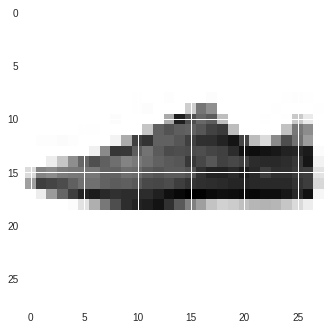

In [15]:

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = 5
# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]
# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# # Show one of the images from the training dataset
plt.imshow(x_train[img_index])

## Data normalization
Normalize the data dimensions so that they are of approximately the same scale.

In [0]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [17]:
print("Number of train data - " + str(len(x_train)))
print("Number of test data - " + str(len(x_test)))

Number of train data - 56000
Number of test data - 14000


In [18]:
# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

x_train shape: (56000, 28, 28, 1) y_train shape: (56000, 10)
56000 train set
14000 test set


#CNN

In [19]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)  

# Compile the model



In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## Train the model




In [43]:
from google.colab import drive, files

from tensorflow.keras.callbacks import ModelCheckpoint

filepath="/content/drive/My Drive/Colab Notebooks/myweights.hdf5"

checkpointer = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True,mode='min')

model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_test, y_test),
         callbacks = [checkpointer])

Train on 56000 samples, validate on 14000 samples
Epoch 1/10
55872/56000 [============================>.] - ETA: 0s - loss: 0.2878 - acc: 0.8949
Epoch 00001: loss improved from inf to 0.28774, saving model to /content/drive/My Drive/Colab Notebooks/myweights.hdf5
56000/56000 [==============================] - 9s 163us/sample - loss: 0.2877 - acc: 0.8950 - val_loss: 0.2343 - val_acc: 0.9116
Epoch 2/10
55872/56000 [============================>.] - ETA: 0s - loss: 0.2733 - acc: 0.9005
Epoch 00002: loss improved from 0.28774 to 0.27377, saving model to /content/drive/My Drive/Colab Notebooks/myweights.hdf5
56000/56000 [==============================] - 9s 161us/sample - loss: 0.2738 - acc: 0.9003 - val_loss: 0.2279 - val_acc: 0.9161
Epoch 3/10
55872/56000 [============================>.] - ETA: 0s - loss: 0.2693 - acc: 0.9006
Epoch 00003: loss improved from 0.27377 to 0.26938, saving model to /content/drive/My Drive/Colab Notebooks/myweights.hdf5
56000/56000 [=============================

#Load model with best accuracy

In [0]:
model.load_weights("/content/drive/My Drive/Colab Notebooks/myweights.hdf5")

## Test Accuracy

In [22]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.91492856


## Visualize prediction
Now let's visualize the prediction using the model you just trained. 
First we get the predictions with the model from the test data.
Then we print out 15 images from the test data set, and set the titles with the prediction (and the groud truth label).
If the prediction matches the true label, the title will be green; otherwise it's displayed in red.

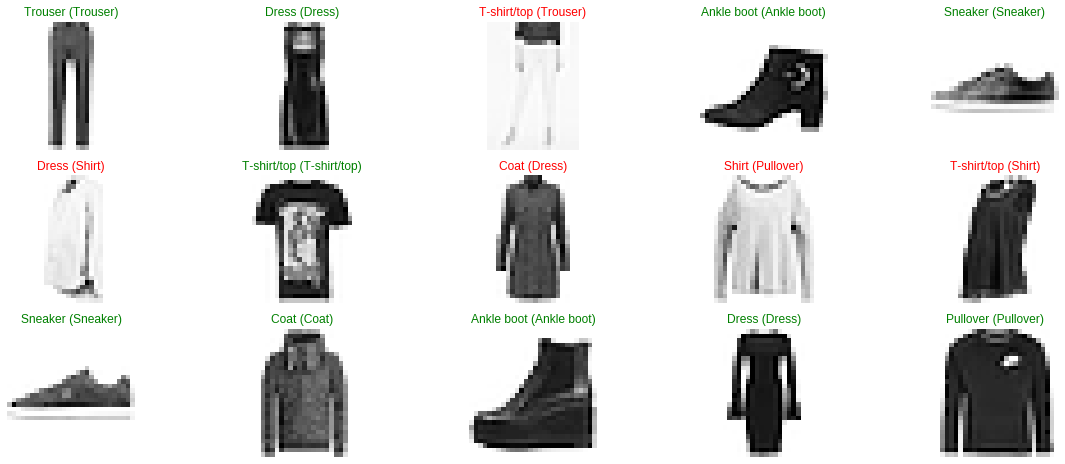

In [33]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

#Feature Standardization

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:923: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_first" (channels on axis 1), i.e. expected either 1, 3 or 4 channels on axis 1. However, it was passed an array with shape (56000, 28, 28, 1) (28 channels).
  ' channels).')


Epoch 1/10
  16/1750 [..............................] - ETA: 19s - loss: 0.6877 - acc: 0.8027

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_first" (channels on axis 1), i.e. expected either 1, 3, or 4 channels on axis 1. However, it was passed an array with shape (56000, 28, 28, 1) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


1750/1750 [==============================] - 19s 11ms/step - loss: 0.3553 - acc: 0.8737
Epoch 2/10
1750/1750 [==============================] - 19s 11ms/step - loss: 0.3088 - acc: 0.8887
Epoch 3/10
1750/1750 [==============================] - 19s 11ms/step - loss: 0.2849 - acc: 0.8952
Epoch 4/10
1750/1750 [==============================] - 19s 11ms/step - loss: 0.2808 - acc: 0.8962
Epoch 5/10
1750/1750 [==============================] - 19s 11ms/step - loss: 0.2709 - acc: 0.8997
Epoch 6/10
1750/1750 [==============================] - 19s 11ms/step - loss: 0.2666 - acc: 0.9012
Epoch 7/10
1750/1750 [==============================] - 19s 11ms/step - loss: 0.2624 - acc: 0.9034
Epoch 8/10
1750/1750 [==============================] - 19s 11ms/step - loss: 0.2523 - acc: 0.9075
Epoch 9/10
1750/1750 [==============================] - 19s 11ms/step - loss: 0.2515 - acc: 0.9076
Epoch 10/10
1750/1750 [==============================] - 19s 11ms/step - loss: 0.2456 - acc: 0.9087


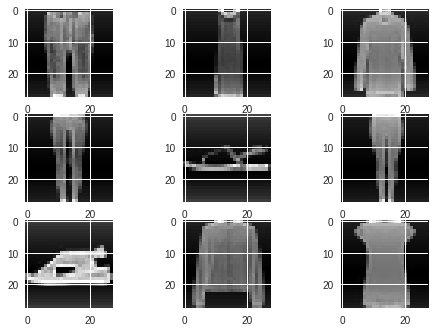

In [34]:
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K
K.set_image_dim_ordering('th')
 
# define data preparation
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# fit parameters from data
datagen.fit(x_train)

# fits the model on batches with real-time data augmentation:
model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
                    steps_per_epoch=len(x_train) / 32, epochs=10)

# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(x_train, x_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break
  
 

#Feature standardization model accuracy

In [35]:
print("Accuracy:",model.evaluate(x_test, y_test, verbose=0)[1])
print("Loss:",model.evaluate(x_test, y_test, verbose=0)[0])

Accuracy: 0.5542143
Loss: 1.674223568371364


#ZCA Whitening

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:334: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:923: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_first" (channels on axis 1), i.e. expected either 1, 3 or 4 channels on axis 1. However, it was passed an array with shape (56000, 28, 28, 1) (28 channels).
  ' channels).')


Epoch 1/10
  10/1750 [..............................] - ETA: 32s - loss: 2.0254 - acc: 0.6281

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_first" (channels on axis 1), i.e. expected either 1, 3, or 4 channels on axis 1. However, it was passed an array with shape (56000, 28, 28, 1) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


1750/1750 [==============================] - 30s 17ms/step - loss: 0.4477 - acc: 0.8499
Epoch 2/10
1750/1750 [==============================] - 30s 17ms/step - loss: 0.3434 - acc: 0.8763
Epoch 3/10
1750/1750 [==============================] - 30s 17ms/step - loss: 0.3269 - acc: 0.8821
Epoch 4/10
1750/1750 [==============================] - 30s 17ms/step - loss: 0.3045 - acc: 0.8883
Epoch 5/10
1750/1750 [==============================] - 30s 17ms/step - loss: 0.3010 - acc: 0.8899
Epoch 6/10
1750/1750 [==============================] - 30s 17ms/step - loss: 0.2876 - acc: 0.8942
Epoch 7/10
1750/1750 [==============================] - 30s 17ms/step - loss: 0.2813 - acc: 0.8967
Epoch 8/10
1750/1750 [==============================] - 30s 17ms/step - loss: 0.2799 - acc: 0.8980
Epoch 9/10
1750/1750 [==============================] - 30s 17ms/step - loss: 0.2716 - acc: 0.8995
Epoch 10/10
1750/1750 [==============================] - 30s 17ms/step - loss: 0.2668 - acc: 0.9012


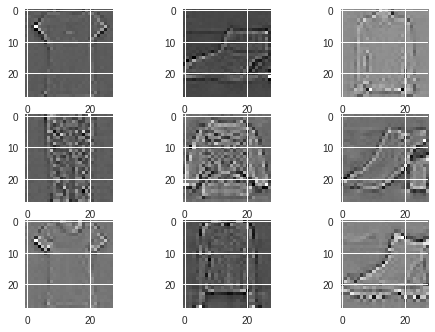

In [36]:
# ZCA whitening
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K
K.set_image_dim_ordering('th')

# define data preparation
datagen = ImageDataGenerator(zca_whitening=True)
# fit parameters from data
datagen.fit(x_train)
model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
                    steps_per_epoch=len(x_train) / 32, epochs=10)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

#ZCA Model accuracy

In [37]:
print("Accuracy:",model.evaluate(x_test, y_test, verbose=0)[1])
print("Loss:",model.evaluate(x_test, y_test, verbose=0)[0])

Accuracy: 0.5227857
Loss: 1.5148782826832363


#Rotation

Epoch 1/10
   3/1750 [..............................] - ETA: 1:03 - loss: 3.4856 - acc: 0.3125

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:923: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_first" (channels on axis 1), i.e. expected either 1, 3 or 4 channels on axis 1. However, it was passed an array with shape (56000, 28, 28, 1) (28 channels).
  ' channels).')
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_first" (channels on axis 1), i.e. expected either 1, 3, or 4 channels on axis 1. However, it was passed an array with shape (56000, 28, 28, 1) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


1750/1750 [==============================] - 57s 33ms/step - loss: 0.7613 - acc: 0.7210
Epoch 2/10
1750/1750 [==============================] - 57s 32ms/step - loss: 0.6326 - acc: 0.7675
Epoch 3/10
1750/1750 [==============================] - 56s 32ms/step - loss: 0.6041 - acc: 0.7775
Epoch 4/10
1750/1750 [==============================] - 57s 32ms/step - loss: 0.5773 - acc: 0.7880
Epoch 5/10
1750/1750 [==============================] - 56s 32ms/step - loss: 0.5680 - acc: 0.7910
Epoch 6/10
1750/1750 [==============================] - 57s 32ms/step - loss: 0.5496 - acc: 0.7996
Epoch 7/10
1750/1750 [==============================] - 57s 32ms/step - loss: 0.5433 - acc: 0.8001
Epoch 8/10
1750/1750 [==============================] - 57s 32ms/step - loss: 0.5323 - acc: 0.8043
Epoch 9/10
1750/1750 [==============================] - 56s 32ms/step - loss: 0.5297 - acc: 0.8038
Epoch 10/10
1750/1750 [==============================] - 57s 32ms/step - loss: 0.5193 - acc: 0.8077


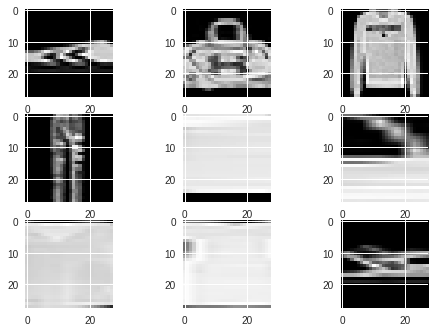

In [38]:
from keras.preprocessing.image import ImageDataGenerator
 
K.set_image_dim_ordering('th')
 
datagen = ImageDataGenerator(rotation_range=90)
# fit parameters from data
datagen.fit(x_train)
model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
                    steps_per_epoch=len(x_train) / 32, epochs=10)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

#Rotation Accuracy

In [39]:
print("Accuracy:",model.evaluate(x_test, y_test, verbose=0)[1])
print("Loss:",model.evaluate(x_test, y_test, verbose=0)[0])

Accuracy: 0.90314287
Loss: 0.26809630179405214


#Random shifts

Epoch 1/10
   3/1750 [..............................] - ETA: 1:04 - loss: 1.3519 - acc: 0.6042

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:923: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_first" (channels on axis 1), i.e. expected either 1, 3 or 4 channels on axis 1. However, it was passed an array with shape (56000, 28, 28, 1) (28 channels).
  ' channels).')
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_first" (channels on axis 1), i.e. expected either 1, 3, or 4 channels on axis 1. However, it was passed an array with shape (56000, 28, 28, 1) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


1750/1750 [==============================] - 61s 35ms/step - loss: 0.5401 - acc: 0.8052 - val_loss: 0.3164 - val_acc: 0.8851
Epoch 2/10
1750/1750 [==============================] - 61s 35ms/step - loss: 0.4613 - acc: 0.8325 - val_loss: 0.2634 - val_acc: 0.9016
Epoch 3/10
1750/1750 [==============================] - 61s 35ms/step - loss: 0.4364 - acc: 0.8423 - val_loss: 0.2562 - val_acc: 0.9065
Epoch 4/10
1750/1750 [==============================] - 60s 35ms/step - loss: 0.4227 - acc: 0.8465 - val_loss: 0.2716 - val_acc: 0.9002
Epoch 5/10
1750/1750 [==============================] - 61s 35ms/step - loss: 0.4087 - acc: 0.8517 - val_loss: 0.2501 - val_acc: 0.9070
Epoch 6/10
1750/1750 [==============================] - 61s 35ms/step - loss: 0.4013 - acc: 0.8553 - val_loss: 0.2566 - val_acc: 0.9049
Epoch 7/10
1750/1750 [==============================] - 61s 35ms/step - loss: 0.3989 - acc: 0.8566 - val_loss: 0.2537 - val_acc: 0.9073
Epoch 8/10
1750/1750 [==============================] - 61s

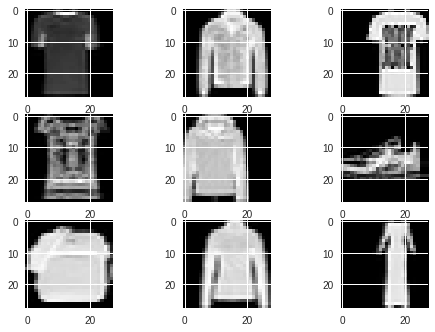

In [40]:
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K
K.set_image_dim_ordering('th')

# define data preparation
shift = 0.2
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)
# fit parameters from data
datagen.fit(x_train)
model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),steps_per_epoch=len(x_train) / 32, epochs=10,validation_data = (x_test,y_test))

# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

#Random shifts accuracy

In [41]:
print("Accuracy:",model.evaluate(x_test, y_test, verbose=0)[1])
print("Loss:",model.evaluate(x_test, y_test, verbose=0)[0])

Accuracy: 0.9072857
Loss: 0.2508672508554799
